# 1. Load Required Libraries

In [14]:
# Load your libraries here
library(quantmod)
library(ggplot2)

---

# 2. Fetch the Data

In [5]:
# Get your data here
palt<-getSymbols("PALT",
               src="yahoo",
               from="2018-01-01",
               to="2021-01-01",
               auto.assign=FALSE)

---

# 3. Exploring the Data

In [7]:
# Explore your data here
head(palt)
tail(palt)
summary(palt)
str(palt)

           PALT.Open PALT.High PALT.Low PALT.Close PALT.Volume PALT.Adjusted
2018-01-02      7.26      7.26     6.96       7.15        3000          7.15
2018-01-03      7.00      7.00     6.34       6.99        8900          6.99
2018-01-04      6.90      7.00     6.90       7.00        1100          7.00
2018-01-05      7.00      7.00     7.00       7.00           0          7.00
2018-01-08      7.01      7.01     6.55       6.55        1200          6.55
2018-01-09      6.55      6.55     6.55       6.55           0          6.55

           PALT.Open PALT.High PALT.Low PALT.Close PALT.Volume PALT.Adjusted
2020-12-23      1.57      1.57     1.50       1.50        1600          1.50
2020-12-24      1.50      1.50     1.50       1.50           0          1.50
2020-12-28      1.50      1.61     1.45       1.50        9700          1.50
2020-12-29      1.57      1.61     1.39       1.59       15500          1.59
2020-12-30      1.51      1.56     1.39       1.50        9800          1.50
2020-12-31      1.36      1.48     1.36       1.46        6200          1.46

     Index              PALT.Open       PALT.High        PALT.Low    
 Min.   :2018-01-02   Min.   :0.600   Min.   :0.630   Min.   :0.600  
 1st Qu.:2018-10-01   1st Qu.:1.278   1st Qu.:1.327   1st Qu.:1.240  
 Median :2019-07-04   Median :3.100   Median :3.100   Median :3.000  
 Mean   :2019-07-03   Mean   :3.210   Mean   :3.298   Mean   :3.129  
 3rd Qu.:2020-04-02   3rd Qu.:5.000   3rd Qu.:5.005   3rd Qu.:5.000  
 Max.   :2020-12-31   Max.   :7.260   Max.   :7.600   Max.   :7.000  
   PALT.Close     PALT.Volume    PALT.Adjusted  
 Min.   :0.630   Min.   :    0   Min.   :0.630  
 1st Qu.:1.270   1st Qu.:    0   1st Qu.:1.270  
 Median :3.100   Median :  200   Median :3.100  
 Mean   :3.233   Mean   : 1571   Mean   :3.233  
 3rd Qu.:5.000   3rd Qu.: 1200   3rd Qu.:5.000  
 Max.   :7.300   Max.   :42900   Max.   :7.300  

An ‘xts’ object on 2018-01-02/2020-12-31 containing:
  Data: num [1:756, 1:6] 7.26 7 6.9 7 7.01 6.55 6.87 6.95 7.2 7.1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:6] "PALT.Open" "PALT.High" "PALT.Low" "PALT.Close" ...
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "yahoo"
 $ updated: POSIXct[1:1], format: "2023-01-11 18:09:58"


---

# 4. Visualising the Data

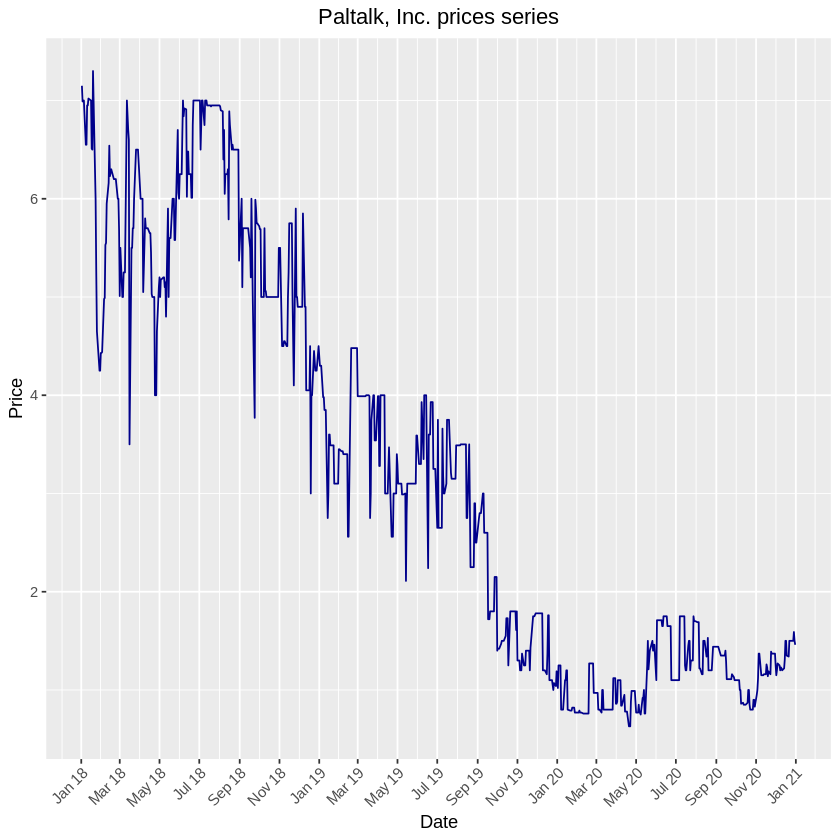

In [18]:
# Visualise your data here
ggplot(data=palt, aes(x=index(palt) ,y=PALT.Adjusted))+geom_line(color="darkblue")+ggtitle("Paltalk, Inc. prices series")+xlab("Date")+ylab("Price")+theme(axis.text.x=element_text(angle=45, hjust=1),plot.title=element_text(hjust=0.5))+scale_x_date(date_labels="%b %y", date_breaks="2 months")

---

# 5. Calculating the Moving Averages

In [23]:
# Calculate the moving averages here
palt_<-subset(palt, index(palt)>="2018-01-01")
palt_ma10<-rollmean(palt_[,6], 10, fill=list(NA, NULL, NA), align=("right"))
palt_ma30<-rollmean(palt_[,6], 30, fill=list(NA, NULL, NA), align=("right"))
palt_$ma10<-coredata(palt_ma10)
palt_$ma30<-coredata(palt_ma30)
palt_$ma10
palt_$ma30

            ma10
2018-01-02    NA
2018-01-03    NA
2018-01-04    NA
2018-01-05    NA
2018-01-08    NA
2018-01-09    NA
2018-01-10    NA
2018-01-11    NA
2018-01-12    NA
2018-01-16 6.916
2018-01-17 6.852
2018-01-18 6.803
2018-01-19 6.833
2018-01-22 6.764
2018-01-23 6.708
2018-01-24 6.578
2018-01-25 6.348
2018-01-26 6.108
2018-01-29 5.831
2018-01-30 5.556
2018-01-31 5.348
2018-02-01 5.141
2018-02-02 4.855
2018-02-05 4.722
2018-02-06 4.622
2018-02-07 4.650
2018-02-08 4.740
2018-02-09 4.880
2018-02-12 5.071
2018-02-13 5.300
2018-02-14 5.480
2018-02-15 5.664
2018-02-16 5.850
2018-02-20 5.972
2018-02-21 6.093
2018-02-22 6.160
2018-02-23 6.225
2018-02-26 6.230
2018-02-27 6.214
2018-02-28 6.128
2018-03-01 6.006
2018-03-02 5.929
2018-03-05 5.799
2018-03-06 5.679
2018-03-07 5.584
2018-03-08 5.489
2018-03-09 5.394
2018-03-12 5.494
2018-03-13 5.579
2018-03-14 5.681
2018-03-15 5.840
2018-03-16 5.640
2018-03-19 5.690
2018-03-20 5.740
2018-03-21 5.785
2018-03-22 5.830
2018-03-23 5.905
2018-03-26 5.8

                ma30
2018-01-02        NA
2018-01-03        NA
2018-01-04        NA
2018-01-05        NA
2018-01-08        NA
2018-01-09        NA
2018-01-10        NA
2018-01-11        NA
2018-01-12        NA
2018-01-16        NA
2018-01-17        NA
2018-01-18        NA
2018-01-19        NA
2018-01-22        NA
2018-01-23        NA
2018-01-24        NA
2018-01-25        NA
2018-01-26        NA
2018-01-29        NA
2018-01-30        NA
2018-01-31        NA
2018-02-01        NA
2018-02-02        NA
2018-02-05        NA
2018-02-06        NA
2018-02-07        NA
2018-02-08        NA
2018-02-09        NA
2018-02-12        NA
2018-02-13 5.9240000
2018-02-14 5.8933333
2018-02-15 5.8693333
2018-02-16 5.8460000
2018-02-20 5.8193333
2018-02-21 5.8076667
2018-02-22 5.7960000
2018-02-23 5.7710000
2018-02-26 5.7393333
2018-02-27 5.7053333
2018-02-28 5.6613333
2018-03-01 5.6113333
2018-03-02 5.5780000
2018-03-05 5.5013333
2018-03-06 5.4576667
2018-03-07 5.4330000
2018-03-08 5.4330000
2018-03-09 5.

---

# 6. Plotting the Moving Averages

In [ ]:
# Plot the calculated averages here
ggplot(data = palt_, aes(x = index(palt_))) +
  geom_line(aes(y = palt_[,6], color = "PALT")) +
  geom_line(aes(y = palt_$ma10, color = "MM10")) +
  geom_line(aes(y = palt_$ma30, color = "MM30")) +
  ggtitle("Paltalk, Inc. prices series") +
  xlab("Date") +
  ylab("Price") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1),
      plot.title = element_text(hjust = 0.5), panel.border = element_blank()) +
  scale_x_date(date_labels = "%b %y", date_breaks = "2 months") +
  scale_colour_manual("Series", values=c("PALT"="gray40", "MM10"="firebrick4", "MM30"="darkcyan"))

# 7. Computing the Retruns

In [25]:
# Compute the returns here
palt_return<-diff(log(palt[,6]))
palt_return<-palt_return[-1,]
summary(palt_return)

     Index            PALT.Adjusted      
 Min.   :2018-01-03   Min.   :-0.634307  
 1st Qu.:2018-10-02   1st Qu.: 0.000000  
 Median :2019-07-05   Median : 0.000000  
 Mean   :2019-07-04   Mean   :-0.002104  
 3rd Qu.:2020-04-02   3rd Qu.: 0.000000  
 Max.   :2020-12-31   Max.   : 0.559616  

---

# 8. Visualising the Returns

Don't know how to automatically pick scale for object of type xts/zoo. Defaulting to continuous.



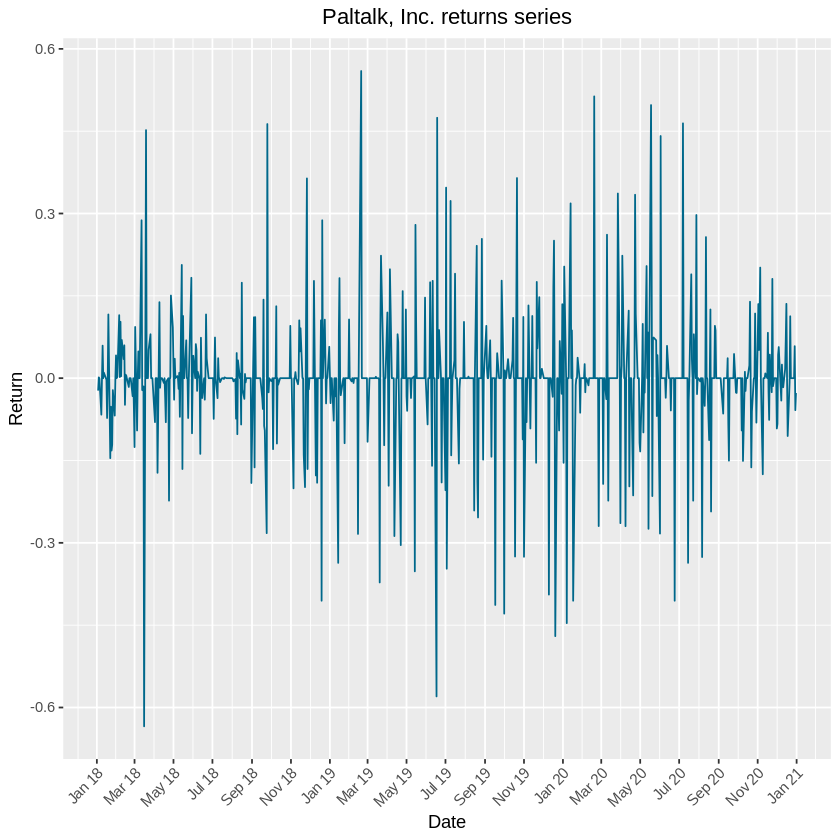

In [26]:
# Visualise your computed returns here
ggplot(data=palt_return, aes(x=index(palt_return) ,y=palt_return))+geom_line(color="deepskyblue4")+ggtitle("Paltalk, Inc. returns series")+xlab("Date")+ylab("Return")+theme(axis.text.x=element_text(angle=45, hjust=1),plot.title=element_text(hjust=0.5))+scale_x_date(date_labels="%b %y", date_breaks="2 months")

---